Import MDAnalysis Module (https://www.mdanalysis.org/) and Matplotlib <br/> 
Don't forget to add the permissions: <br/>
sudo jupyter-nbextension enable nglview --py --sys-prefix <br/>
sudo  jupyter-nbextension enable --py widgetsnbextension <br/>

In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

In [7]:
# name and files for the simulation studied LPT - no GM1

name = '_DPPC_DIPC_chol_352'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/sans_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/5_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

# name and files for the simulation studied LPT - 10% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/users/cornet/Documents/PhD/Matthieu/3-5-2/10_GM1/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1.xtc'

Load xtc and gro files using mda.Universe('struct file','traj file')

In [8]:
u = mda.Universe( path+fgro, path+fxtc)

In [9]:
sel_all = u.select_atoms("all and (name PO4 or name GM5)")

In [10]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [146]:
# TAKE THE LAST FRAME
frame = 9210
u.trajectory[frame]

< Timestep 9210 with unit cell dimensions [417.30527 417.30527 154.61     90.       90.       90.     ] >

In [147]:
# set the x and y min and max values

sel_all = "all and (name PO4 or name GM5)"
patch = u.select_atoms(sel_all).positions
print(patch)

xmax = max(patch[:,0])
ymax = max(patch[:,1])
#dmax = int(min(xmax,ymax))
print(xmax)
print(ymax)

xmin = min(patch[:,0])
ymin = min(patch[:,1])

print(xmin)
print(ymin)

[[401.76      86.810005  52.460003]
 [298.22     115.08      48.510002]
 [125.31     256.28003   52.850002]
 ...
 [247.22002   41.010002  12.550001]
 [ 95.740005  67.89001   20.49    ]
 [187.76001  335.24002   15.450001]]
417.19
417.27002
0.080000006
0.17000002


In [148]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM5)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM5')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 4840
number of lipids in the upper leaflet: 2420 + number of lipids in the lower leaflet:2420 
= 4840


In [149]:
# TAKE THE LAST FRAME

u.trajectory[frame]

< Timestep 9210 with unit cell dimensions [417.30527 417.30527 154.61     90.       90.       90.     ] >

In [150]:
sel_Lo = "all and (name PO4 and resname DPPC)"
M_Lo = leaflet1.select_atoms(sel_Lo).positions
for i in range(len(M_Lo)):
    M_Lo[i,2] = 1

sel_Ld = "all and (name PO4 and resname DIPC)"
M_Ld = leaflet1.select_atoms(sel_Ld).positions
for i in range(len(M_Ld)):
    M_Ld[i,2] = 0
    
M_coords = np.concatenate((M_Lo, M_Ld), axis = 0)
print(M_coords)

[[188.71     173.06001    1.      ]
 [244.95001   90.92       1.      ]
 [255.12001   47.970005   1.      ]
 ...
 [306.49002  221.87       0.      ]
 [320.73     303.62003    0.      ]
 [248.00002  254.47       0.      ]]


In [151]:
# set the number of boxes into which will be divided the membrane

N = 15
dx = (xmax-xmin)/N
dy = (ymax-ymin)/N
print(dx)
print(dy)

27.80733439127604
27.80666707356771


(225, 3)


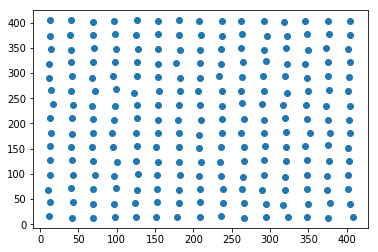

In [152]:
# leaflet 1
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary1 = []
#del Mphi1
Mphi1_Lo = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b1=leaflet1.select_atoms(sel).centroid().tolist()
        bary1.append(b1)
        
        # composition rates in each box
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1PC= leaflet1.select_atoms(sel_totPC).positions
        n_tot1PC=len(tot1PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo1= leaflet1.select_atoms(sel_Lo).positions
        n_Lo1=len(Lo1) # number of molecules of the Lo phase (DPPC here)
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DIPC"
        Ld1= leaflet1.select_atoms(sel_Ld).positions
        n_Ld1=len(Ld1) # number of molecules of the Ld phase (DIPC here)
        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_1= leaflet1.select_atoms(sel_GM1).positions
        n_GM1_1=len(GM1_1) # number of GM1 molecules
        
        
        if  n_tot1PC!=0:
            phi1_Lo=n_Lo1/n_tot1PC
        else :
            print('leaflet 1, empty box: i=%d and j=%d' % (i,j))
        
        Mphi1_Lo[i,j]=phi1_Lo
        
bary1=np.array(bary1)

plt.scatter(bary1[:,0],bary1[:,1])

print(np.shape(bary1))

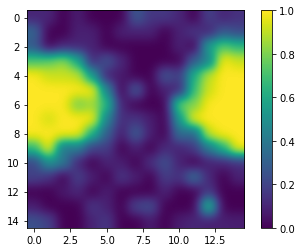

In [153]:
# DPPC / (DPPC+DIPC) leaflet 1
plt.imshow(Mphi1_Lo, interpolation='gaussian')
plt.colorbar()

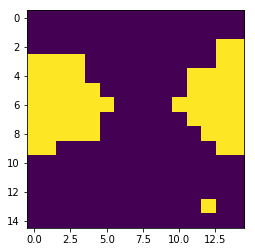

In [154]:
# lower leaflet binary composition

threshold = 0.6 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi1_bin = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi1_Lo[i,j]>= threshold :
            Mphi1_bin[i,j]=1

#print(Mphi1_bin)          

plt.imshow(Mphi1_bin)

In [155]:
print(Mphi1_bin)
print(np.shape(Mphi1_bin))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(15, 15)


In [156]:
M_sum = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        M_sum[i,j] = sum(Mphi1_bin[i,:])+sum(Mphi1_bin[:,j])
print(M_sum)

[[ 7.  7.  6.  6.  4.  1.  0.  0.  0.  0.  1.  4.  6.  8.  8.]
 [ 7.  7.  6.  6.  4.  1.  0.  0.  0.  0.  1.  4.  6.  8.  8.]
 [ 9.  9.  8.  8.  6.  3.  2.  2.  2.  2.  3.  6.  8. 10. 10.]
 [13. 13. 12. 12. 10.  7.  6.  6.  6.  6.  7. 10. 12. 14. 14.]
 [15. 15. 14. 14. 12.  9.  8.  8.  8.  8.  9. 12. 14. 16. 16.]
 [16. 16. 15. 15. 13. 10.  9.  9.  9.  9. 10. 13. 15. 17. 17.]
 [18. 18. 17. 17. 15. 12. 11. 11. 11. 11. 12. 15. 17. 19. 19.]
 [16. 16. 15. 15. 13. 10.  9.  9.  9.  9. 10. 13. 15. 17. 17.]
 [15. 15. 14. 14. 12.  9.  8.  8.  8.  8.  9. 12. 14. 16. 16.]
 [11. 11. 10. 10.  8.  5.  4.  4.  4.  4.  5.  8. 10. 12. 12.]
 [ 7.  7.  6.  6.  4.  1.  0.  0.  0.  0.  1.  4.  6.  8.  8.]
 [ 7.  7.  6.  6.  4.  1.  0.  0.  0.  0.  1.  4.  6.  8.  8.]
 [ 7.  7.  6.  6.  4.  1.  0.  0.  0.  0.  1.  4.  6.  8.  8.]
 [ 8.  8.  7.  7.  5.  2.  1.  1.  1.  1.  2.  5.  7.  9.  9.]
 [ 7.  7.  6.  6.  4.  1.  0.  0.  0.  0.  1.  4.  6.  8.  8.]]


In [157]:
val_max = 0
x_big = 0
y_big = 0
for i in range(N):
    for j in range(N):
        if M_sum[i,j]>val_max:
            val_max = M_sum[i,j]
            x_big = i
            y_big = j
print(x_big)
print(y_big)
print(val_max)

6
13
19.0


In [158]:
def modulo(x,a,b):
    if x < a:
        x = x + (b-a)
    elif x >= b:
        x = x - (b-a)
    return x

In [159]:
x_center_b = 7
y_center_b = 7

vec_cor_b = np.zeros((1,2))

-1
6
[[-1.  6.]]


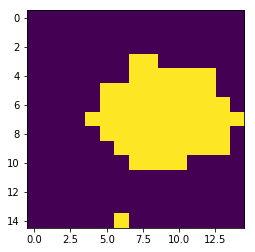

In [160]:
x_cor = x_big - x_center_b
y_cor = y_big - y_center_b
print(x_cor)
print(y_cor)
M_full = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi1_bin[i,j]==1:
            M_full[ modulo(i-x_cor,0,N), modulo(j-y_cor,0,N) ] = Mphi1_bin[i,j]
            
plt.imshow(M_full)

vec_cor_b[0,0] = vec_cor_b[0,0] + x_cor
vec_cor_b[0,1] = vec_cor_b[0,1] + y_cor
print(vec_cor_b)

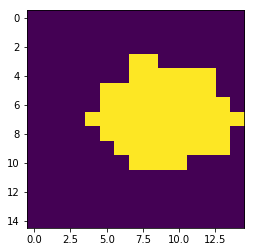

In [161]:
for i in range(N):
    for j in range(N):
        if (M_full[modulo(i-1,0,N),modulo(j-1,0,N)]==0 and M_full[modulo(i-1,0,N),j]==0 and M_full[modulo(i-1,0,N),modulo(j+1,0,N)]==0 and M_full[i,modulo(j-1,0,N)]==0 and M_full[i,modulo(j+1,0,N)]==0 and M_full[modulo(i+1,0,N),modulo(j-1,0,N)]==0 and M_full[modulo(i+1,0,N),j]==0 and M_full[modulo(i+1,0,N),modulo(j+1,0,N)]==0):
            M_full[i,j] = 0
plt.imshow(M_full)

In [162]:
# for M_full

nb_Lo = int(np.sum(M_full))
print(nb_Lo)

coords_Lo = np.zeros((nb_Lo,2))
l = 0

for i in range(N):
    for j in range(N):
        if M_full[i,j] == 1 :
            coords_Lo[l][0] = i
            coords_Lo[l][1] = j
            l += 1

box_x_mean = np.mean(coords_Lo[:,0])
box_y_mean = np.mean(coords_Lo[:,1])
print(box_x_mean)
print(box_y_mean)

box_x_max = 0
box_y_max = 0

for i in range(N):
    for j in range(N):
        if M_full[i,j]==1 and np.abs(i-box_x_mean) > box_x_max:
            box_x_max = np.abs(i-box_x_mean)
        if M_full[i,j]==1 and np.abs(j-box_y_mean) > box_y_max:
            box_y_max = np.abs(j-box_y_mean)
print(box_x_max)
print(box_y_max)
box_max = np.ceil(max(box_x_max,box_y_max))
print(box_max)

57
6.754385964912281
8.964912280701755
3.754385964912281
5.035087719298245
6.0


(3.490143369175627, 14.50985663082437, -10.365176600441503, -2.634823399558498)

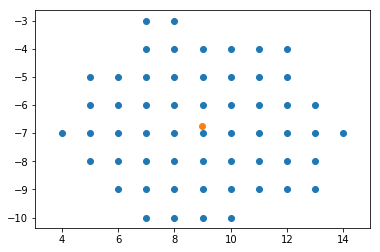

In [163]:
plt.scatter(coords_Lo[:,1], -coords_Lo[:,0])
plt.scatter(box_y_mean, -box_x_mean)
plt.axis('equal')

In [164]:
x_mean_b = int(round(box_x_mean))
print(x_mean_b)
y_mean_b = int(round(box_y_mean))
print(y_mean_b)

7
9


0
2
[[-1.  8.]]


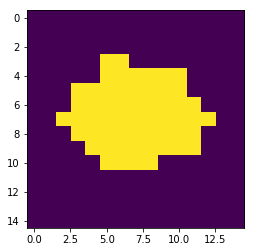

In [165]:
x_cor = x_mean_b - x_center_b
y_cor = y_mean_b - y_center_b
print(x_cor)
print(y_cor)
M_center = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if M_full[i,j]==1:
            M_center[ modulo(i-x_cor,0,N), modulo(j-y_cor,0,N) ] = M_full[i,j]
            
plt.imshow(M_center)

vec_cor_b[0,0] = vec_cor_b[0,0] + x_cor
vec_cor_b[0,1] = vec_cor_b[0,1] + y_cor
print(vec_cor_b)

In [166]:
x_center = x_center_b /N * (xmax-xmin)
y_center = y_center_b /N * (ymax-ymin)
r_max = box_max /N * (ymax-ymin) *1.1

vec_cor = vec_cor_b /N * (ymax-ymin)

print(x_center)
print(y_center)
print(r_max)
print(vec_cor)

194.6513407389323
194.64666951497395
183.5240026855469
[[-27.80666707 222.45333659]]


In [167]:
for i in range(len(M_coords)):
    print(M_coords[i]) 

[188.71    173.06001   1.     ]
[244.95001  90.92      1.     ]
[255.12001   47.970005   1.      ]
[210.36002 373.38      1.     ]
[268.25    137.31001   1.     ]
[253.30002 198.90001   1.     ]
[207.6       47.380005   1.      ]
[ 30.28    125.46001   1.     ]
[224.93002 225.50002   1.     ]
[177.99002 307.73      1.     ]
[217.76001 358.56003   1.     ]
[109.43001  94.26001   1.     ]
[112.83001   39.570004   1.      ]
[83.98001 68.61001  1.     ]
[369.82    350.92004   1.     ]
[122.520004 252.67001    1.      ]
[239.79002 401.51      1.     ]
[149.56      18.730001   1.      ]
[252.49    417.27002   1.     ]
[289.14      56.160004   1.      ]
[162.99002 342.39      1.     ]
[170.91002 283.76      1.     ]
[146.46     90.51001   1.     ]
[328.68    319.46002   1.     ]
[160.83 114.32   1.  ]
[123.340004    7.5600004   1.       ]
[238.91      38.120003   1.      ]
[224.79002  89.68001   1.     ]
[126.46001 386.43002   1.     ]
[175.49002 409.94003   1.     ]
[190.11002  32.97      1.

[94.95001 94.34     1.     ]
[  1.44    206.60002   1.     ]
[103.58001  70.15      1.     ]
[187.75002 120.23001   1.     ]
[203.77     82.40001   1.     ]
[257.66      61.970005   1.      ]
[111.810005 367.30005    1.      ]
[129.88      73.490005   1.      ]
[194.3  414.76   1.  ]
[ 99.850006 414.25003    1.      ]
[ 73.310005 389.85       1.      ]
[219.66002 112.78001   1.     ]
[142.70001     3.9800003   1.       ]
[286.01      31.030003   1.      ]
[205.33002 152.85      1.     ]
[207.49    177.55002   1.     ]
[146.32     114.170006   1.      ]
[221.30002 211.93001   1.     ]
[247.87001  32.72      1.     ]
[146.12001 411.90002   1.     ]
[154.22    115.80001   1.     ]
[187.09001 401.49002   1.     ]
[166.69    314.15002   1.     ]
[191.60002  15.49      1.     ]
[248.01001 199.27      1.     ]
[236.34001 370.85004   1.     ]
[138.75002 349.96002   1.     ]
[131.46    403.08002   1.     ]
[229.62003 372.56      1.     ]
[158.70001 324.87003   1.     ]
[204.54001   3.26      1.

In [168]:
for i in range(len(M_coords)):
    M_coords[i,0] = modulo(M_coords[i,0] - vec_cor[0,0],xmin,xmax)
    M_coords[i,1] = modulo(M_coords[i,1] - vec_cor[0,1],ymin,ymax)

In [169]:
print(M_coords)

[[216.51668  367.7067     1.      ]
 [272.75668  285.56668    1.      ]
 [282.92667  242.61667    1.      ]
 ...
 [334.2967   416.51666    0.      ]
 [348.53668   81.16669    0.      ]
 [275.80667   32.016666   0.      ]]


In [170]:
nb_r = 5
dr = int(r_max/nb_r)

nb_theta = 12
dtheta = 2*np.pi/nb_theta

print(dr)
print(dtheta)

36
0.5235987755982988


In [171]:
# Condition à voir

if r_max < np.floor((xmax-xmin)/2)+dr:
    print('OK')
else:
    print('too big')

OK


In [172]:
# leaflet 1
# divide the leaflet into a pie

x = M_coords[:,0]
y = M_coords[:,1]

x_pie_r = [[] for r in range(nb_r)]
y_pie_r = [[] for r in range(nb_r)]
pie_r = [[] for r in range(nb_r)]

x_pie_theta = [[] for t in range(nb_theta)]
y_pie_theta = [[] for t in range(nb_theta)]
pie_theta = [[] for t in range(nb_theta)]

r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(M_coords)):
        xi = M_coords[i,0]
        yi = M_coords[i,1]

        if (xi-x_center)**2+(yi-y_center)**2 < r_crown**2 and (xi-x_center)**2+(yi-y_center)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)
        
    x_pie_r[r] = x_r
    y_pie_r[r] = y_r
    pie_r[r] = i_r
    
for i in range(len(M_coords)):
    xi = M_coords[i,0]
    yi = M_coords[i,1]
    
    theta = np.arccos((xi-x_center)/np.sqrt((xi-x_center)**2+(yi-y_center)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_center : # if angle > pi
        t = nb_theta-t-1
    
    x_pie_theta[t].append(xi)
    y_pie_theta[t].append(yi)
    pie_theta[t].append(i)

(-20.672684388570353,
 438.03602260570955,
 -27.24328061715026,
 437.9768472669737)

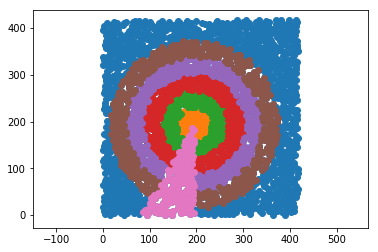

In [173]:
plt.scatter(x,y)

for r in range(nb_r):
    plt.scatter(x_pie_r[r], y_pie_r[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=8;    
plt.scatter(x_pie_theta[t], y_pie_theta[t])    
plt.axis('equal')

In [174]:
# leaflet 1
# divide the leaflet into a pie - Lo lipids only

l_Lo = int(np.sum(M_coords[:,2]))
M_coords_Lo = np.zeros((l_Lo,3))

j = 0
for i in range(len(M_coords)):
    if M_coords[i,2] == 1:
        M_coords_Lo[j] = M_coords[i]
        j+=1

x_Lo = M_coords_Lo[:,0]
y_Lo = M_coords_Lo[:,1]

x_pie_r_Lo = [[] for r in range(nb_r)]
y_pie_r_Lo = [[] for r in range(nb_r)]
pie_r_Lo = [[] for r in range(nb_r)]

x_pie_theta_Lo = [[] for t in range(nb_theta)]
y_pie_theta_Lo = [[] for t in range(nb_theta)]
pie_theta_Lo = [[] for t in range(nb_theta)]


r_crown = 0
for r in range(nb_r):

    x_r = []
    y_r = []
    i_r = []
    
    r_crown = r_crown+dr
    
    for i in range(len(M_coords_Lo)):
        
        xi = M_coords_Lo[i,0]
        yi = M_coords_Lo[i,1]

        if (xi-x_center)**2+(yi-y_center)**2 < r_crown**2 and (xi-x_center)**2+(yi-y_center)**2 >= (r_crown-dr)**2:
            x_r.append(xi)
            y_r.append(yi)
            i_r.append(i)

    x_pie_r_Lo[r] = x_r
    y_pie_r_Lo[r] = y_r
    pie_r_Lo[r] = i_r
    
for i in range(len(M_coords_Lo)):
    xi = M_coords_Lo[i,0]
    yi = M_coords_Lo[i,1]

    theta = np.arccos((xi-x_center)/np.sqrt((xi-x_center)**2+(yi-y_center)**2))
    t = int(np.floor(theta/dtheta))
    if yi<y_center : # if angle > pi
        t = nb_theta-t-1

    x_pie_theta_Lo[t].append(xi)
    y_pie_theta_Lo[t].append(yi)
    pie_theta_Lo[t].append(i)

(-25.064151969568655, 440.02752680780173, -24.53627985899561, 443.169659079958)

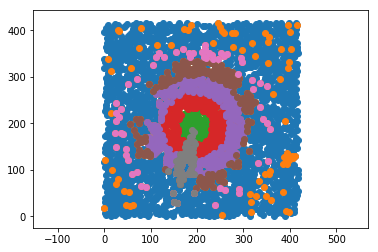

In [175]:
plt.scatter(x,y)
plt.scatter(x_Lo,y_Lo)

for r in range(nb_r):
    plt.scatter(x_pie_r_Lo[r], y_pie_r_Lo[r])
    
#for t in range():
    #plt.scatter(x_pie_theta[t], y_pie_theta[t])
t=8;    
plt.scatter(x_pie_theta_Lo[t], y_pie_theta_Lo[t])    
plt.axis('equal')

In [176]:
pie = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [177]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r[r])):
                if (pie_r[r][l] in pie_theta[t]):
                    pie[r][t].append(pie_r[r][l])
    

In [178]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie[r][t])) )

r=0 t=0 4
r=0 t=1 5
r=0 t=2 5
r=0 t=3 5
r=0 t=4 6
r=0 t=5 5
r=0 t=6 5
r=0 t=7 6
r=0 t=8 7
r=0 t=9 6
r=0 t=10 7
r=0 t=11 5
r=1 t=0 15
r=1 t=1 18
r=1 t=2 15
r=1 t=3 17
r=1 t=4 16
r=1 t=5 15
r=1 t=6 16
r=1 t=7 14
r=1 t=8 17
r=1 t=9 14
r=1 t=10 14
r=1 t=11 16
r=2 t=0 28
r=2 t=1 28
r=2 t=2 27
r=2 t=3 25
r=2 t=4 25
r=2 t=5 28
r=2 t=6 27
r=2 t=7 27
r=2 t=8 26
r=2 t=9 26
r=2 t=10 28
r=2 t=11 27
r=3 t=0 31
r=3 t=1 34
r=3 t=2 34
r=3 t=3 36
r=3 t=4 34
r=3 t=5 31
r=3 t=6 34
r=3 t=7 35
r=3 t=8 31
r=3 t=9 33
r=3 t=10 35
r=3 t=11 32
r=4 t=0 39
r=4 t=1 39
r=4 t=2 36
r=4 t=3 43
r=4 t=4 39
r=4 t=5 41
r=4 t=6 47
r=4 t=7 44
r=4 t=8 39
r=4 t=9 38
r=4 t=10 38
r=4 t=11 39


In [179]:
pie_Lo = [[[] for t in range(nb_theta)] for r in range(nb_r)]

In [180]:
for r in range(nb_r):
        for t in range(nb_theta):
            for l in range(len(pie_r_Lo[r])):
                if (pie_r_Lo[r][l] in pie_theta_Lo[t]):
                    pie_Lo[r][t].append(pie_r_Lo[r][l])
    

In [181]:
for r in range(nb_r):
    for t in range(nb_theta):
        print('r=%d t=%d %d' % (r,t,len(pie_Lo[r][t])) )

r=0 t=0 4
r=0 t=1 5
r=0 t=2 5
r=0 t=3 5
r=0 t=4 6
r=0 t=5 5
r=0 t=6 5
r=0 t=7 6
r=0 t=8 7
r=0 t=9 6
r=0 t=10 7
r=0 t=11 5
r=1 t=0 15
r=1 t=1 17
r=1 t=2 15
r=1 t=3 17
r=1 t=4 15
r=1 t=5 15
r=1 t=6 16
r=1 t=7 14
r=1 t=8 17
r=1 t=9 14
r=1 t=10 14
r=1 t=11 16
r=2 t=0 25
r=2 t=1 28
r=2 t=2 25
r=2 t=3 24
r=2 t=4 21
r=2 t=5 9
r=2 t=6 22
r=2 t=7 21
r=2 t=8 21
r=2 t=9 25
r=2 t=10 27
r=2 t=11 25
r=3 t=0 17
r=3 t=1 20
r=3 t=2 31
r=3 t=3 27
r=3 t=4 10
r=3 t=5 4
r=3 t=6 11
r=3 t=7 5
r=3 t=8 5
r=3 t=9 22
r=3 t=10 9
r=3 t=11 5
r=4 t=0 4
r=4 t=1 6
r=4 t=2 13
r=4 t=3 8
r=4 t=4 3
r=4 t=5 5
r=4 t=6 7
r=4 t=7 4
r=4 t=8 4
r=4 t=9 3
r=4 t=10 3
r=4 t=11 2


In [182]:
threshold = 0.6
M_pie_bin = np.zeros((nb_r, nb_theta))

for r in range(nb_r):
    for t in range(nb_theta):
        if(len(pie_Lo[r][t])/len(pie[r][t])>=threshold):
            M_pie_bin[r,t]=1

In [183]:
print(M_pie_bin)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [184]:
boundary = [[],[]]

for t in range(nb_theta):
    print(t)
    boundary[0].append(t)
    
    b_found = 0
    for r in range(0,nb_r-2,1):
        
        if M_pie_bin[r,t]==1 and (M_pie_bin[r+1,t]==0 or r+1>=nb_r) and (M_pie_bin[r+2,t]==0 or r+2>=nb_r):
            b_found = 1
            print('ok')
            boundary[1].append(r)
    print('b_found = %d' % b_found)
    if b_found == 0:
        if M_pie_bin[nb_r-2,t]==1 and M_pie_bin[nb_r-1,t]!=1:
            boundary[1].append(nb_r-2)
        elif M_pie_bin[nb_r-1,t]==1:
            boundary[1].append(nb_r-1)
                
theta_l = np.array(boundary[0])
r_theta = np.array(boundary[1])
print(theta_l)
print(r_theta)

0
ok
b_found = 1
1
ok
b_found = 1
2
b_found = 0
3
b_found = 0
4
ok
b_found = 1
5
ok
b_found = 1
6
ok
b_found = 1
7
ok
b_found = 1
8
ok
b_found = 1
9
b_found = 0
10
ok
b_found = 1
11
ok
b_found = 1
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[2 2 3 3 2 1 2 2 2 3 2 2]


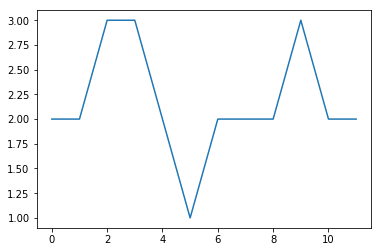

In [185]:
plt.plot(theta_l,r_theta)

In [186]:
r_q = np.fft.rfft(r_theta)
for i in range((len(r_q))):
    print(r_q[i])

(26+0j)
(1.3660254037844382-0.3660254037844385j)
(-3-1.732050807568879j)
(-1+1j)
(2.000000000000001-1.2212453270876722e-15j)
(-0.3660254037844391+1.3660254037844393j)
0j


In [187]:
r_q_pow = abs(r_q)**2
print(r_q_pow)

[676.   2.  12.   2.   4.   2.   0.]


[0. 1. 2. 3. 4. 5. 6.]


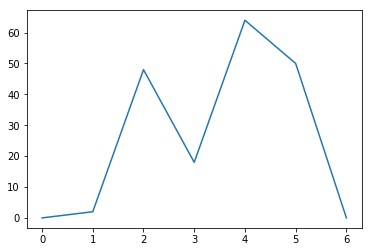

In [188]:
q = np.arange(nb_theta/2+1)
print(q)
plt.plot(r_q_pow*q**2)